# Assigment 3: Data Mining In Action

## Initial Data Exploration and PreProcessing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


#TrainAndTestSet
TrainTest_Set = pd.read_csv('Assignment3-WeatherData.csv')

#Real Datset to be predicted
RealSample = pd.read_csv('Assignment3-UnknownData.csv')

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'RainToday' column
TrainTest_Set['RainToday'] = label_encoder.fit_transform(TrainTest_Set['RainToday'])

#Binarisation For Locationsfhfhf
TrainTest_Set = pd.get_dummies(TrainTest_Set)

In [5]:
imputer = KNNImputer(n_neighbors=5)
TrainTest_Set_Imputed = imputer.fit_transform(TrainTest_Set)


## Classifiers

### Decision Tree Classifier

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



X = TrainTest_Set.drop('RainTomorrow', axis=1)
y = TrainTest_Set['RainTomorrow']
test_size = 0.2
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_seed)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

#### Model Evaluation

In [15]:
# Import required packages for evaluating a classification model using the test dataset
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [16]:
y_pred = model.predict(X_test)

Accuracy : 0.78193359375
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7916
           1       0.52      0.53      0.53      2324

    accuracy                           0.78     10240
   macro avg       0.69      0.69      0.69     10240
weighted avg       0.78      0.78      0.78     10240



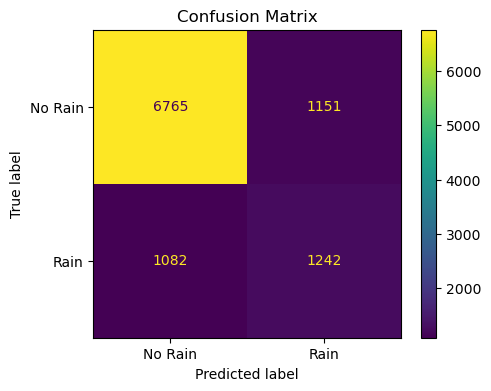

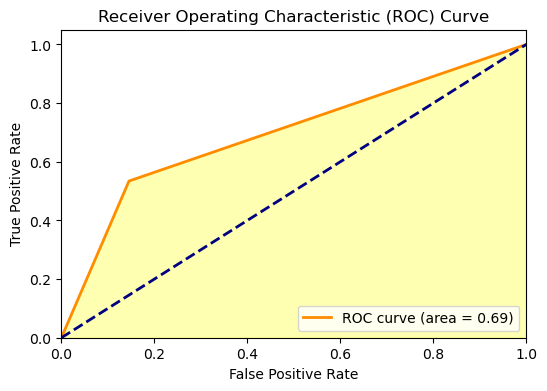

In [22]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#Output Results
print(f'Accuracy : {accuracy}')
print(class_report)


cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
cmp.plot(ax=ax)

# Set the title
plt.title('Confusion Matrix')
plt.show()

def plot_roc_curve(y_test, y_pred_prob):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure(figsize=(6, 4), dpi=100)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.fill_between(fpr, tpr, color='yellow', alpha=0.3)

    # Plot a diagonal line (chance curve)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


y_pred_prob = model.predict_proba(X_test)[:,1]

plot_roc_curve(y_test, y_pred_prob)


In [27]:
#predict real values
RealX = RealSample.drop(RealSample.columns[0], axis=1)
model.predict(RealX) 



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Location
- WindDir3pm
- WindDir9am
- WindGustDir
Feature names seen at fit time, yet now missing:
- Location_Adelaide
- Location_Albany
- Location_Albury
- Location_AliceSprings
- Location_BadgerysCreek
- ...


### K Nearest Neighbour

### Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier

forrest_model = RandomForestClassifier(n_estimators=100, random_state=42)

forrest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [170]:
y_pred= forrest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

Accuracy : 0.8486328125
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      7916
           1       0.75      0.49      0.60      2324

    accuracy                           0.85     10240
   macro avg       0.81      0.72      0.75     10240
weighted avg       0.84      0.85      0.84     10240



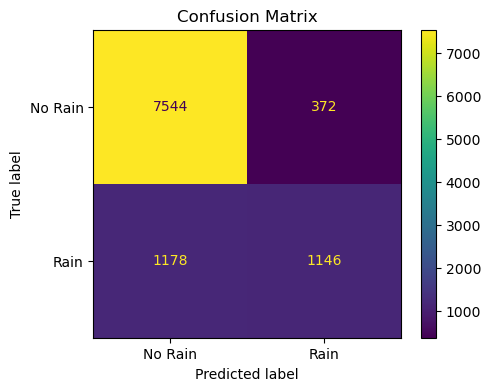

In [171]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#Output Results
print(f'Accuracy : {accuracy}')
print(class_report)


cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
cmp.plot(ax=ax)

# Set the title
plt.title('Confusion Matrix')
plt.show()


### Support Vector Machine

### Neural Network